# Pattern recognition using a Keras neural network for predicting Coronary Artery Dieases

Heart diseases are often underestimated, but, in reality, they are the leading cause of death in the world. Among them, coronary artery disease (CAD) accounts for about a third of all deaths worldwide in people over 35 years of age. CAD is the result of arteriosclerosis, which consists in the narrowing of the blood vessels and the hardening of its walls. In some cases, CAD can completely block the influx of oxygen-rich blood to the heart muscle, causing a heart attack.


**Goal :**
The goal is to predict a condition of heart disease through a classification algorithm based on Keras neural networks.

**Dataset:** Heart Disease Data Set is extracted from the  UCI Machine Learning Repository.

https://archive.ics.uci.edu/dataset/45/heart+disease


This dataset is provided by the following four clinical institutions:
1. Cleveland Clinic Foundation (CCF),
2. Hungarian Institute of Cardiology (HIC),
3. Long Beach Medical Center (LBMC), and
4. University Hospital in Switzerland (SUH).



# 1. Library

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Data Extraction - Load data

In [142]:
! pip install ucimlrepo

In [143]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [144]:
dataset_url = 'https://archive.ics.uci.edu/static/public/45/data.csv'
df = pd.read_csv(dataset_url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Each of the attributes are detailed as follows:

1. age: Age in years
2. sex: Sex (1 = male; 0 = female)
3. cp: Chest pain type (Value 1: typical angina; Value 2: atypical angina; Value 3: non-anginal pain, Value 4: asymptomatic)
4. trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
5. chol: Serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: Resting electrocardiographic results (Value 0: normal; Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment (Value 1: upsloping; Value 2: flat; Value 3: downsloping)
12. ca: Number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


14. num: HeartDisease: Diagnosis of heart disease – angiographic disease status (Value 0: < 50% diameter narrowing; Value 1: > 50% diameter narrowing)—in any major vessel: attributes 59 through 68 are vessels

# EDA
* There are 303 rows and 14 columns
* There is no missing data
* Columns contain text data: -NA-
* Columns contain categoriacal data:
* Object data:
* The target is: num

In [145]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


**Conclusion:**

1. Total number of rows are 303
2. Columns: `oldpeak`, `ca` and `thal` are dtype - `float64`
3. `ca` and `thal` contains the NAN values.

## Explore on the data Columns
* There are 5 unique nums


### Explore Target/Label Parameter

In [147]:
df.num.nunique() # df.column.nunique(), number of unique values in a column

5

In [148]:
# 'target=num' is the column containing the labels (0 or 1 or 2 )
class_counts = df.groupby('num').size()

# Alternatively, you can also use value_counts for a simpler approach:
class_counts = df['num'].value_counts()

# Display the counts for each class
print(class_counts)

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


#### Result : Since the num column has 5 labels (ranging from 0 to 4, which typically indicate different levels of heart disease severity), this is a **multi-class classification** problem, not a **binary classification problem**.

### Explore Features

In [149]:
categorical_columns = ['cp','slope','thal']
numerical_col = ['age','thalach','oldpeak']

In [150]:
# ChestPain Type
cp_dict = {1: 'typical_angina', 2: 'atypical_angina', 3: 'non-anginal_pain', 4: 'asymptomatic'}

cp_count = df.cp.nunique()
print(cp_count)

df.groupby('cp').size() # group by chest_pain - cp

4


,0
cp,
1,23
2,50
3,86
4,144


In [151]:
for key in cp_dict.keys():
  print(key)

1
2
3
4


## Descriptive statistics
* The min finishedsqft is 1, which suggests there will be outliers in the data
* The min lastsoldprice is 535, which suggests there will be outliers in the data


In [152]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# Data Cleaning

## Drop Duplicates rows
* Return DataFrame with duplicate rows removed
* It turns out in this case there is no dupliates rows


In [153]:
df.drop_duplicates(inplace=True)

## Missing Values

You can check for missing values (NaNs) in your dataset using the following methods in pandas:


### 1. Check if Any NaNs Exist in the Dataset**

In [154]:
df.isna().any().any()

True

### 2.Check for NaNs in Each Column

In [155]:
# Check for NaN values in each column
print(df.isna().sum())  # Shows the count of NaNs per column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


### 3. Visualize Missing Data

You can use the seaborn library's heatmap function to visualize the missing values in the dataset:

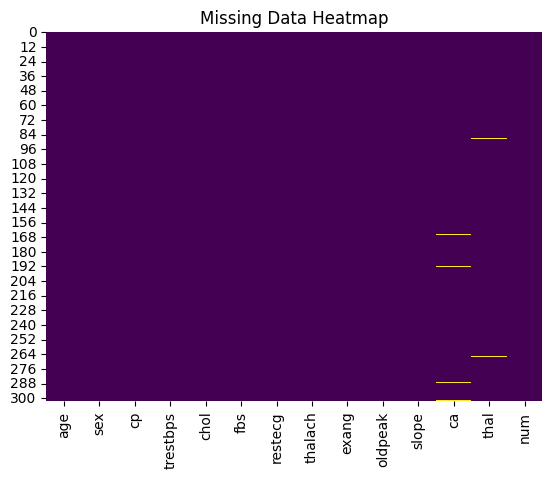

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

### 4. Check Specific Columns for Missing Values

In [157]:
# Check for NaNs in a specific column, e.g., 'age'
df['thal'].isna().sum()  # Shows the number of NaNs in the 'age' column

2

In [158]:
# Get rows with NaN values
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
87    53    0   3       128   216    0        2      115      0      0.0   
166   52    1   3       138   223    0        0      169      0      0.0   
192   43    1   4       132   247    1        2      143      1      0.1   
266   52    1   4       128   204    1        0      156      1      1.0   
287   58    1   2       125   220    0        0      144      0      0.4   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
87       1  0.0   NaN    0  
166      1  NaN   3.0    0  
192      2  NaN   7.0    1  
266      2  0.0   NaN    2  
287      2  NaN   7.0    0  
302      1  NaN   3.0    0  


### Ways to Handle Missing Values:

Once you've identified the missing values, you can proceed to either remove them or impute them


**1. Remove Rows with Missing Values:**
If the number of rows with missing values is small, you can drop those rows from your dataset.

**2. Imputation:**

1.  **Mean/Median/Mode Imputation:** Replace missing values with the mean, median, or mode of the respective columns.

2. **KNN Imputation:** Use a more sophisticated approach like K-Nearest Neighbors (KNN) to impute missing values based on similar samples.


RESULTS : `THAL` and `CA` has NAN values , since the dataset is already small , we will go with `mean` Imputation



```
missing_columns = ['ca', 'thal']
```



In [159]:
# Columns that have missing values
missing_values_columns = ['ca', 'thal']

**Remove Rows with Missing Values**

In [160]:
# Drop rows where 'ca' or 'thal' columns have NaN values
df_clean = df.dropna(subset=missing_values_columns)

# Check if there are any missing values left in 'ca' and 'thal'
print(df_clean[missing_values_columns].isna().sum())


ca      0
thal    0
dtype: int64


**Mean/Median/Mode Imputation:**

Replace missing values with the mean, median, or mode of the respective columns.

In [161]:
from sklearn.impute import SimpleImputer

# Impute missing values in 'ca' and 'thal' columns using the mean (or median, etc.)
imputer = SimpleImputer(strategy='mean')  # You can change strategy to 'median' or 'most_frequent'
df[missing_values_columns] = imputer.fit_transform(df[missing_values_columns])

# Check if imputation was successful
print(df[missing_values_columns].isna().sum())


ca      0
thal    0
dtype: int64


**KNN Imputation:**

Use a more sophisticated approach like K-Nearest Neighbors (KNN) to impute missing values based on similar samples.

In [162]:
from sklearn.impute import KNNImputer

# Use KNNImputer to fill missing values
imputer = KNNImputer(n_neighbors=10)  # You can change the number of neighbors
X = df.drop('ca', axis=1).values
X = imputer.fit_transform(X)

# Proceed with encoding the target and resampling
# y = df['num'].values

In [163]:
# Define features and target
X = df.drop('num', axis=1).values
y = df['num'].values

In [164]:
# Apply train/test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Visualise the Missing Data after fixing it

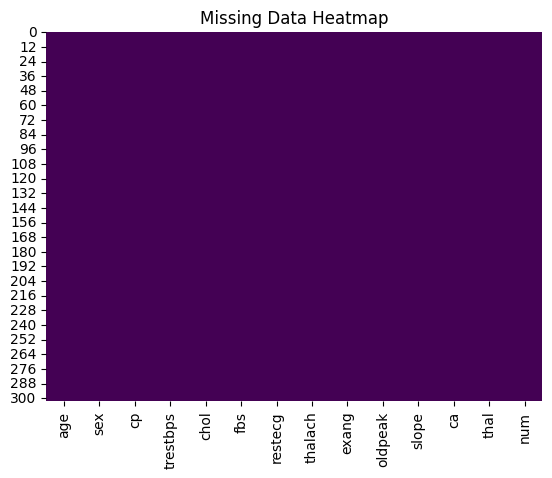

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

# EDA (new)

### Histgram

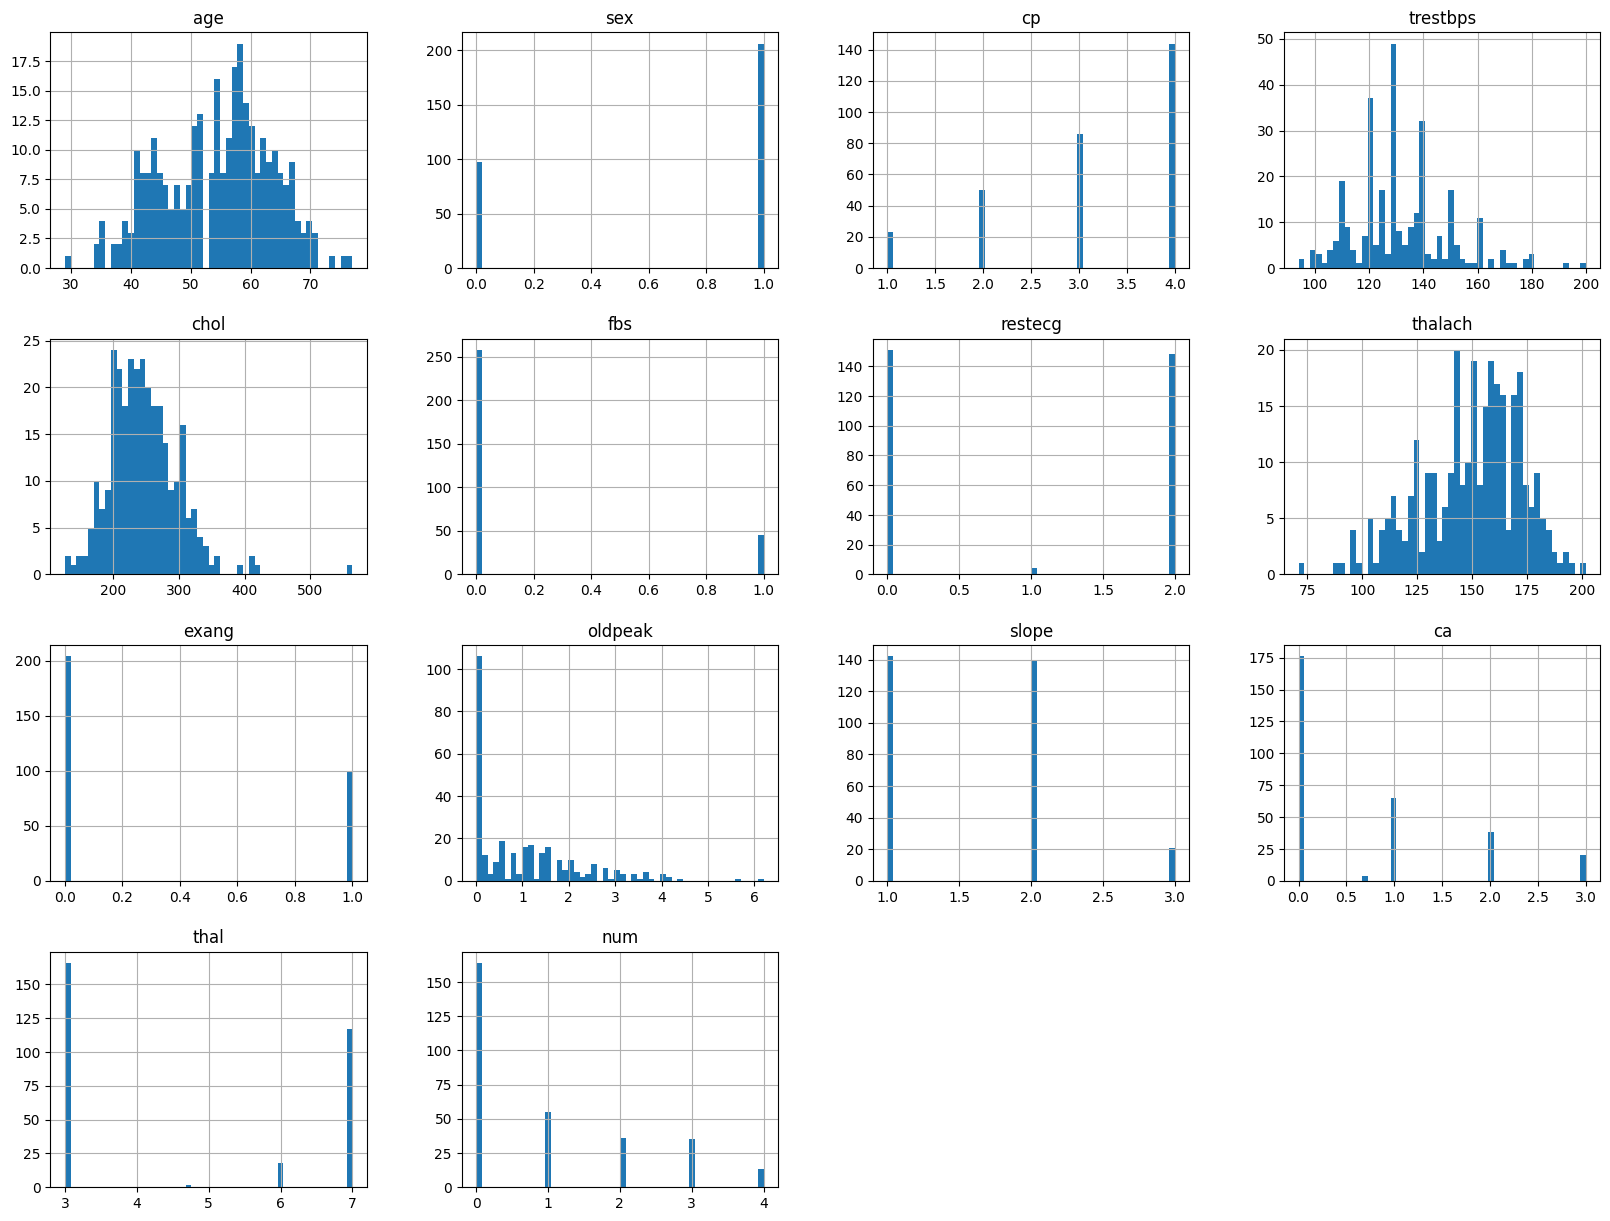

In [169]:
df.hist(bins=50, figsize=(20,15));

### Correlation matrix
The target variable is the `num`, so we are going to look at how much each feature variable correlates the target variable.

In [170]:
corr_matrix = df.corr()
corr_matrix['num'].sort_values(ascending=False)

,num
num,1.000000
ca,0.517390
thal,0.508799
oldpeak,0.504092
cp,0.407075
exang,0.397057
slope,0.377957
sex,0.224469
age,0.222853
restecg,0.183696


### Scatter matrix between num, thal, ca, chol

In [171]:
scat_cols = ['num', 'thal', 'ca', 'chol']

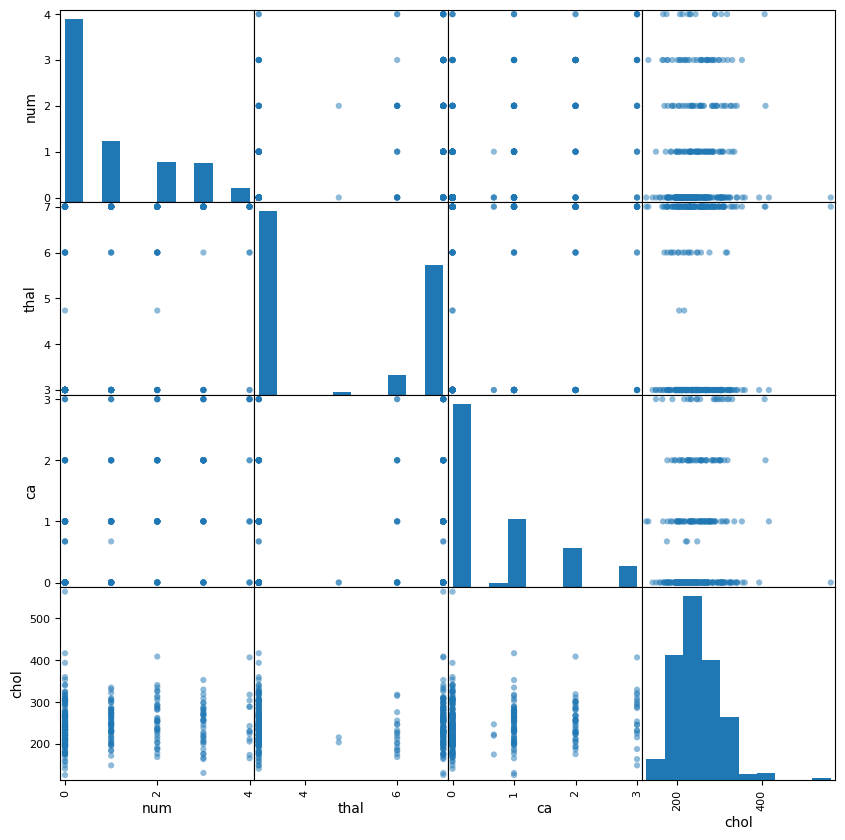

In [172]:
_ = pd.plotting.scatter_matrix(df[scat_cols], figsize = [10, 10],
                      s = 20, marker = 'o')

# 3. Data PreProcessing

## 3.1 Inspecting outliers

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


### Detect outliers using IQR

Outliers in age:
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []
Outliers in sex:
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []
Outliers in cp:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
20    64    1   1       110   211    0        2      144      1      1.8   
21    58    0   1       150   283    1        2      162      0      1.0   
27    66    0   1       150   226    0        0      114      0      2.6   
30    69    0   1       140   239    0        0      151      0      1.8   
41    40    1   1       140   199    0        0      178      1      1.4   
59    51    1   1       125   213    0        2      125      1      1.4   
101   34    1   1       118   182    0        2      174      0      0.0   
112   52 

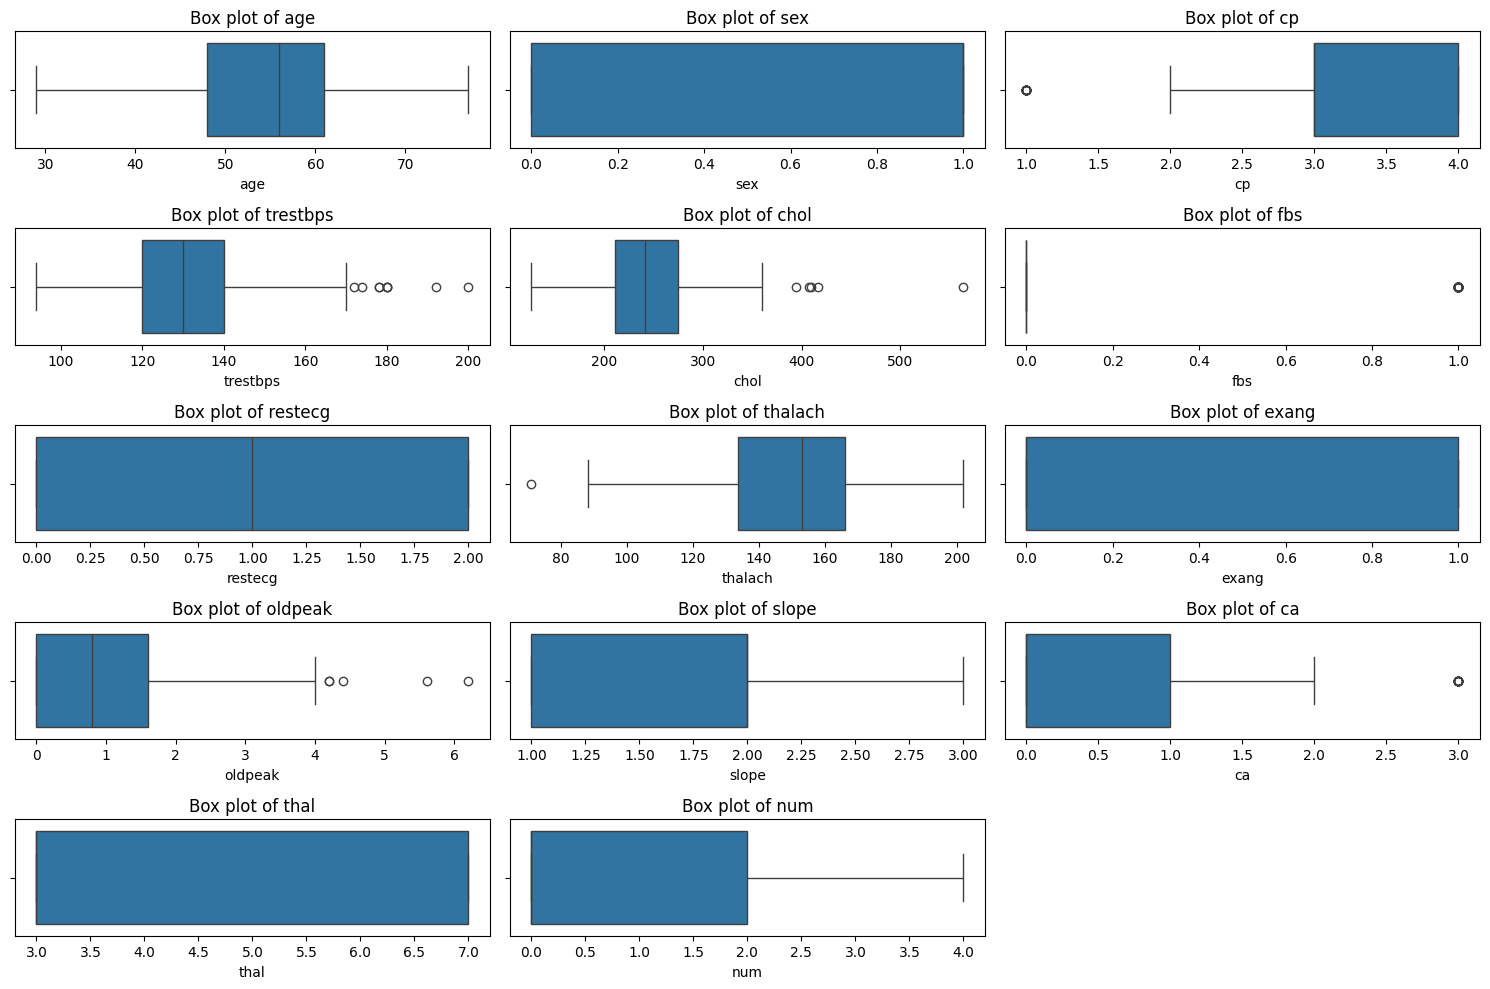

In [174]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect and print outliers for each numerical column
for column in numerical_columns:
    outliers = detect_outliers(df, column)
    print(f"Outliers in {column}:\n", outliers)

# Visualize outliers using box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

### Handle outliers using Capping Technique

by either removing them or capping them to a certain threshold.

In [176]:
# Function to handle outliers by capping them
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])


In [177]:
# Detect and handle outliers for each numerical column
for column in numerical_columns:
    outliers = detect_outliers(df, column)
    print(f"Outliers in {column}:\n", outliers)
    cap_outliers(df, column)

Outliers in age:
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []
Outliers in sex:
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []
Outliers in cp:
       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0   1       145   233    1        2      150      0      2.3   
20   64.0  1.0   1       110   211    0        2      144      1      1.8   
21   58.0  0.0   1       150   283    1        2      162      0      1.0   
27   66.0  0.0   1       150   226    0        0      114      0      2.6   
30   69.0  0.0   1       140   239    0        0      151      0      1.8   
41   40.0  1.0   1       140   199    0        0      178      1      1.4   
59   51.0  1.0   1       125   213    0        2      125      1      1.4   
101  34.0  1.0   1       118   182    0        2      174      0      0.0   


In [178]:
# Verify that outliers have been handled
for column in numerical_columns:
    outliers = detect_outliers(df, column)
    print(f"Outliers in {column} after capping:\n", outliers)

Outliers in age after capping:
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []
Outliers in sex after capping:
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []
Outliers in cp after capping:
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []
Outliers in trestbps after capping:
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []
Outliers in chol after capping:
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []
Outliers in fbs after capping:
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []
Outliers in restecg after capping:
 Empty

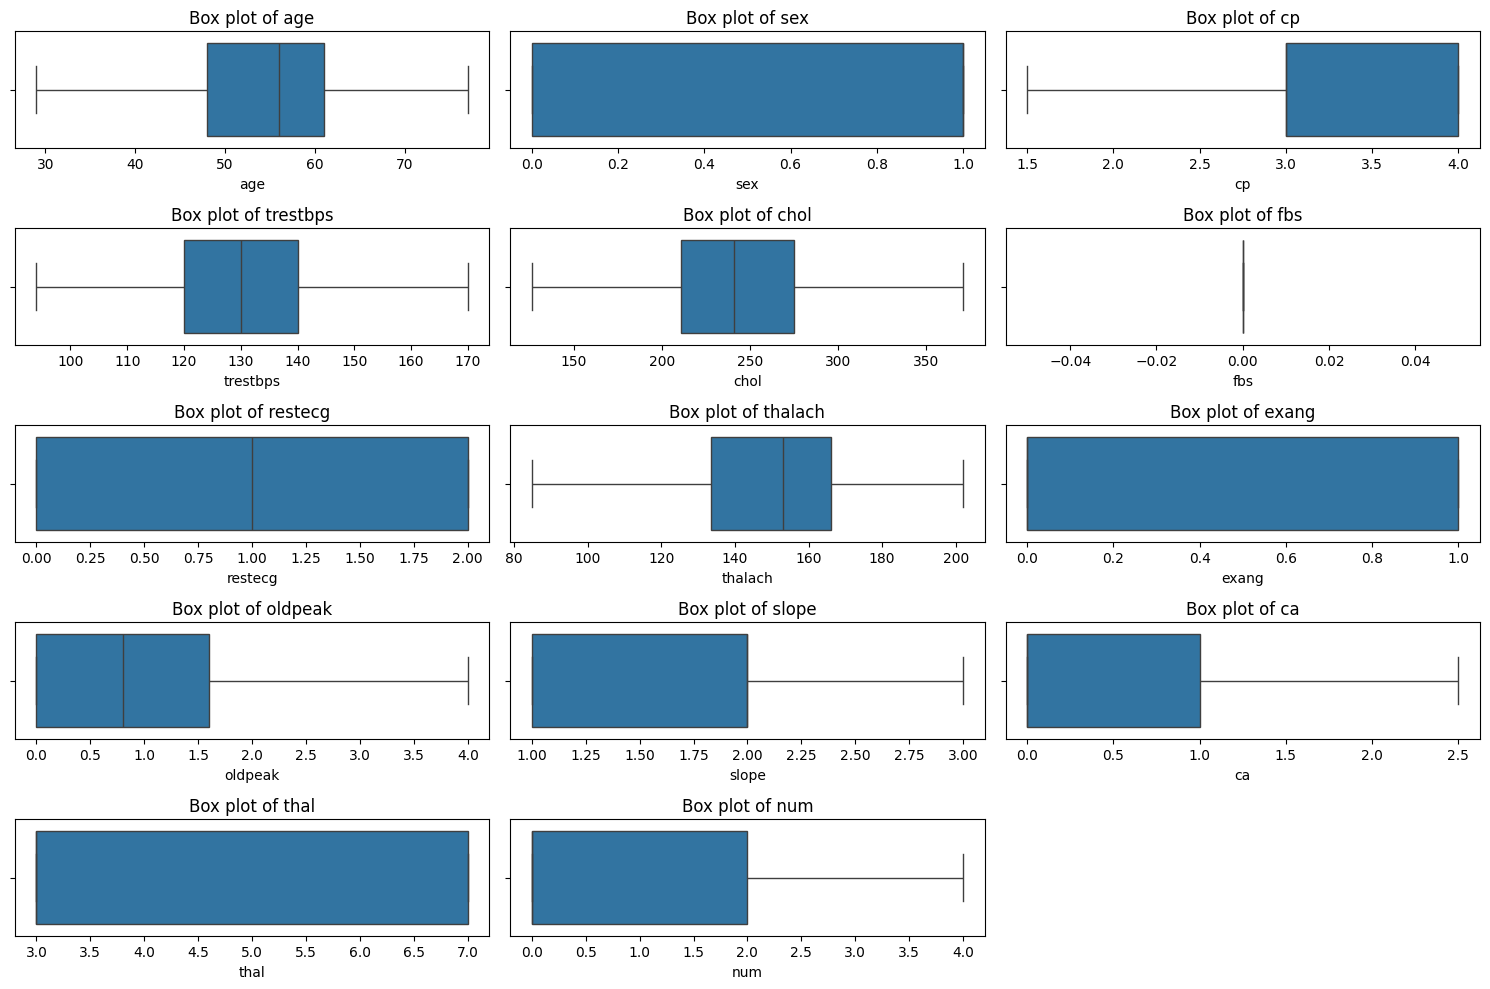

In [179]:
# Visualize outliers using box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

## 3.2 Drop textual data
* Unnamed column has no useful information, need to drop
* Column info is a summary information which can be found in other columns, thus can be dropped

In [137]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## 3.3 Convert Categorical columns to  numerical values using OneHotEncoder or to_categorical()

* `num`

## 3.4 Convert <Column> type to datatype

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


# 4 Train Test split



```
# [X_train , y_train] --> ML Algorithm()

X_test --> ML Algorithm() --> y_predicated_value

y_predicated_value == y_test
1. Calculate Accuracy
2. create Confusion Matrix
```


In [139]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


nums = ['age','thalach','oldpeak']
cat = ['cp','slope','thal']

# # Split the dataset
# X = df.iloc[:, 0:13]
# y = df.iloc[:, 13]

# # Alternatively
# X = df.drop('num', axis=1)  # Features (all columns except the target)
# y = df['num'] # Multiple target (0, 1, 2, 3, 4)  # Binary target (0 = No CAD, 1 = CAD)

# The 'num' column is the target and has 5 classes (0 to 4)
X = df.drop('num', axis=1).values  # Features (all columns except 'num')
y = df['num'].values  # Multi-class target (0 to 4)


### Unique target `num` Values

In [140]:
np.unique(y)

array([0, 1, 2, 3, 4])

# Classfication

Keras binary classifier

# 5. KNN Classifier

### Pre-Processing - Feature Engineering

In [14]:
# Setup the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), nums),
        ('cat', OneHotEncoder(), cat)
    ])

### Setup Pipeline

In [15]:
# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier())])

### Hyperparameter setup

In [16]:
# Specify the hyperparameter space
parameters = {'classifier__n_neighbors': [13],
              'classifier__p': [2],
              'classifier__metric': ['euclidean']}

### Split Data

In [19]:
# # Alternatively
# Binary target (0 = No CAD, 1 = CAD)

# The 'num' column is the target and has 5 classes (0 to 4)
X = df.drop('num', axis=1)  # Features (all columns except the target 'num')
y = df['num']  # Multi-class target (0, 1, 2, 3, 4)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)

### Fit and predict

In [21]:
# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'thalach',
                                                                          'oldpeak']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['cp',
                                                                          'slope',
                                                                          'thal'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['euclidean'],
                         'classifier__n_neighbors': [13],
                         'classifier__p': [2]})

### Score

In [22]:
# Predict on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the model
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Test accuracy: {grid_search.score(X_test, y_test)}")

Best parameters found: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 13, 'classifier__p': 2}
Test accuracy: 0.6229508196721312


# 6. Keras binary classifier

### Preprocessing - Feature Engineering

In [180]:
# The 'num' column is the target and has 5 classes (0 to 4)
X = df.drop('num', axis=1).values  # Features (all columns except 'num')
y = df['num'].values  # Multi-class target (0 to 4)

### One-hot encode the target variable for multi-class classification

**One-Hot Encoding of y:** The target y is now one-hot encoded to match the shape of the model's output, which has 5 neurons in the output layer due to the 5 possible classes.


**One-hot encoding** is used to convert categorical variables into a format that can be provided to machine learning algorithms to improve predictions. In this case, the target variable num represents the presence of heart disease and has integer values from 0 to 4. These integers represent different categories, not ordinal values, so they should not be treated as continuous numerical values.


In [181]:
# One-hot encode the target variable for multi-class classification
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))  # Reshape y to a 2D array and one-hot encode

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [182]:
# Unique target values
np.unique(y_encoded)

array([0., 1.])

### Split the Dataset

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=0, test_size=0.2, shuffle=True)

### Visualise the Splitting Dataset

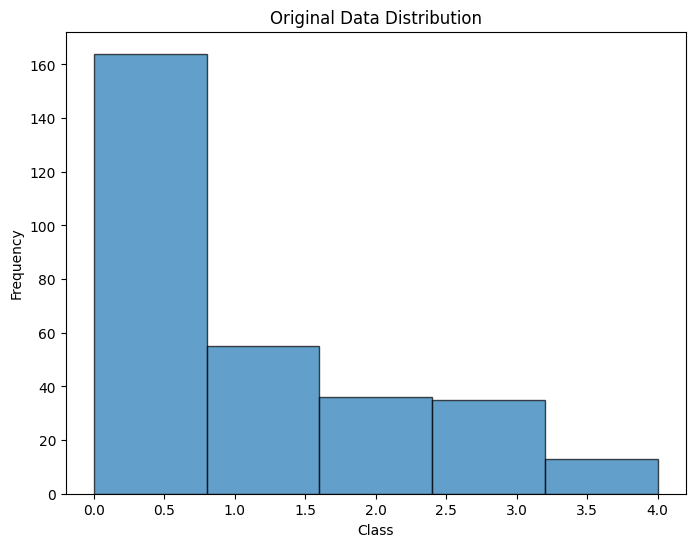

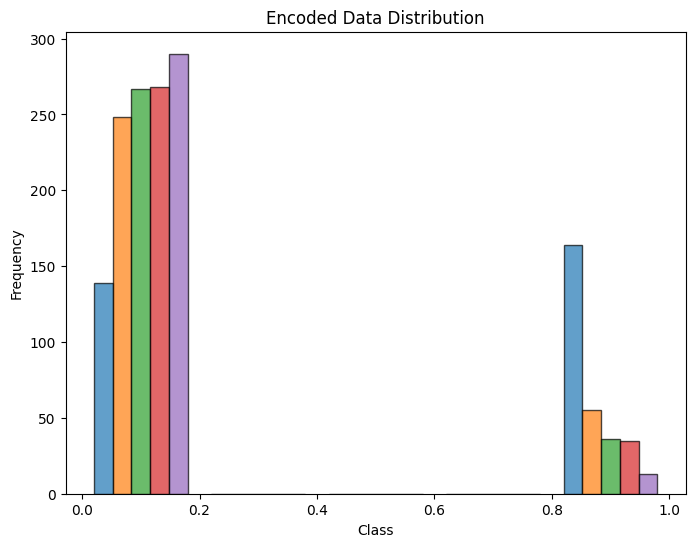

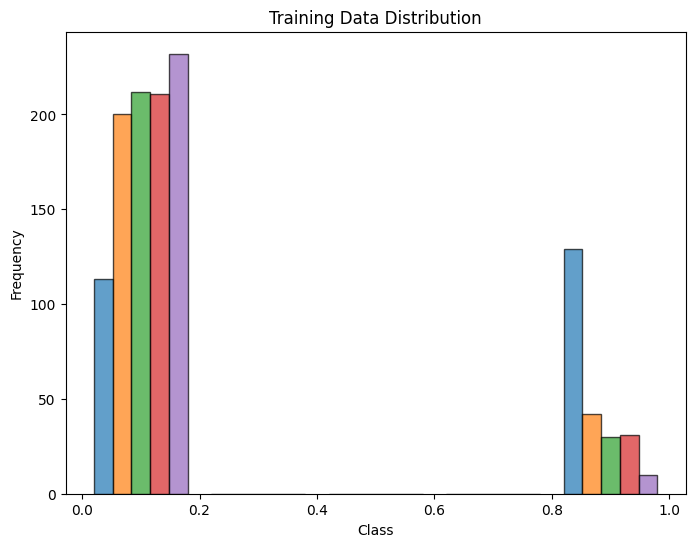

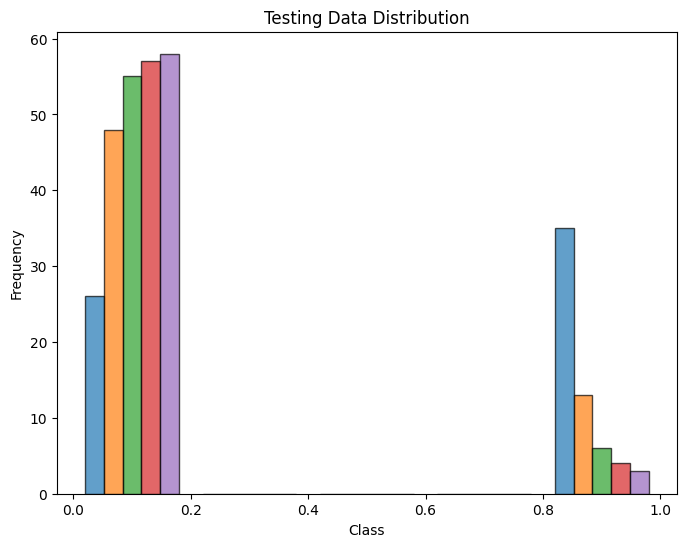

In [184]:
# Function to plot the distribution of the target variable
def plot_distribution(y, title):
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=5, edgecolor='k', alpha=0.7)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

# Visualize the distribution of the target variable
plot_distribution(y, 'Original Data Distribution')
plot_distribution(y_encoded, 'Encoded Data Distribution')
plot_distribution(y_train, 'Training Data Distribution')
plot_distribution(y_test, 'Testing Data Distribution')

In [185]:
# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Setup Keras Model

In [186]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

In [187]:
# Define the Keras binary classifier model
model = Sequential()

### Add Layers

the output layer to have 5 neurons (one for each class of target [0,4]), and use the `softmax` activation function instead of `sigmoid`.

In [188]:
# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(5, activation='softmax'))  # Output layer for multi-class classification (5 neurons)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

use **loss function** to `CategoricalCrossentropy` for multi-class classification and `BinaryCrossentropy` for binary-classfication

In [189]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

### Fit and predict

In [190]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4924 - loss: 1.4082 - val_accuracy: 0.5082 - val_loss: 1.2932
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5285 - loss: 1.2821 - val_accuracy: 0.5574 - val_loss: 1.1893
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5471 - loss: 1.1688 - val_accuracy: 0.5574 - val_loss: 1.1151
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5807 - loss: 1.0870 - val_accuracy: 0.6066 - val_loss: 1.0659
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5760 - loss: 1.0434 - val_accuracy: 0.6066 - val_loss: 1.0341
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5759 - loss: 0.9747 - val_accuracy: 0.6230 - val_loss: 1.0122
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5885 - loss: 0.9662 - val_accuracy: 0.6557 - val_loss: 0.9979
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6499 - loss: 0.9031 - val_accuracy: 0.6557 - val_loss: 0.9850
Epoch 9

### Evaluate the model

In [191]:
# Evaluate the accuracy or any other metric of interest
from sklearn.metrics import classification_report


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6241 - loss: 1.1143 
Test Accuracy: 0.6393
Test Loss: 1.0974


### Score

In [192]:
# Predict on new data (test set)
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Evaluate the predictions using classification metrics
print(classification_report(true_classes, predicted_classes))

# Optionally, print the predicted classes for the first 10 examples
print(predicted_classes[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.50      0.31      0.38        13
           2       0.20      0.17      0.18         6
           3       0.29      0.50      0.36         4
           4       0.00      0.00      0.00         3

    accuracy                           0.64        61
   macro avg       0.35      0.38      0.35        61
weighted avg       0.59      0.64      0.61        61

[0 0 1 1 1 0 3 1 3 0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

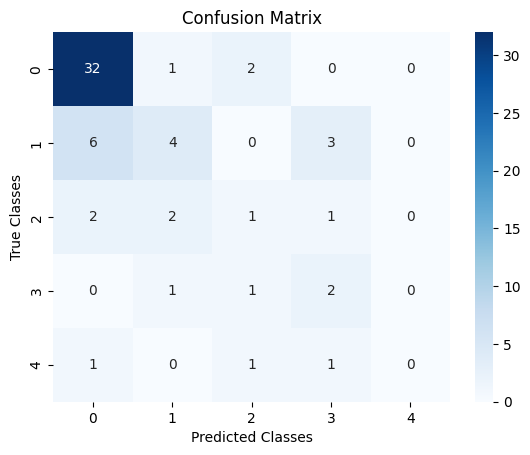

In [193]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

## Insights to Expect:
1. **Accuracy:**  The test accuracy will show how well the model performs on multi-class classification. Compare training and validation accuracies to check for potential overfitting.


2. **Classification Report:** This will include precision, recall, and F1-score for each of the 5 classes, providing detailed performance metrics.

3. **Class Imbalance:** If some classes are underrepresented, you might notice poorer performance (lower recall or precision) for those specific classes. If this is the case, you could consider techniques like class weighting or data augmentation.

 # Improvement : Check for Class Imbalance:

In [108]:
# Check the distribution of the 'num' target column
class_distribution = df['num'].value_counts()
print(class_distribution)

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


**a. Class Weights:**
In Keras, you can pass a `class_weight` parameter to the `fit()` function. This tells the model to give more importance to the minority classes, thus helping to balance the learning.

The **class_weight** dictionary adjusts the model’s loss function to give higher weight to underrepresented classes, making the model more sensitive to those classes.

##  Strategies to Handle Class Imbalance:

### 1. Class Weights:

In Keras, you can pass a `class_weight` parameter to the **fit()** function. This tells the model to give more importance to the minority classes, thus helping to balance the learning.

In [109]:
from sklearn.utils import class_weight

# Compute class weights based on the distribution of target: 'num'
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(df['num']),
                                                  y=df['num'])
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

{0: 0.3695121951219512, 1: 1.1018181818181818, 2: 1.6833333333333333, 3: 1.7314285714285715, 4: 4.661538461538462}


Note: The **class_weight** dictionary adjusts the model’s loss function to give higher weight to underrepresented classes, making the model more sensitive to those classes

In [110]:
# Pass the class weights to the fit function
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    class_weight=class_weight_dict)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4612 - loss: 1.4933 - val_accuracy: 0.5246 - val_loss: 1.3490
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5401 - loss: 1.3335 - val_accuracy: 0.4754 - val_loss: 1.5212
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5198 - loss: 1.3927 - val_accuracy: 0.5246 - val_loss: 1.3872
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5074 - loss: 1.4730 - val_accuracy: 0.4590 - val_loss: 1.3601
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5247 - loss: 1.5625 - val_accuracy: 0.5738 - val_loss: 1.1895
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5398 - loss: 1.4444 - val_accuracy: 0.4426 - val_loss: 1.4680
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4552 - loss: 1.3776 - val_accuracy: 0.5574 - val_loss: 1.4100
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5816 - loss: 1.3984 - val_accuracy: 0.5246 - val_loss: 1.3388
Epoch 9

In [111]:
# Evaluate the accuracy or any other metric of interest
from sklearn.metrics import classification_report

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4414 - loss: 1.4175
Test Accuracy: 0.4590
Test Loss: 1.3519


In [112]:
# Predict on new data (test set)
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Evaluate the predictions using classification metrics
print(classification_report(true_classes, predicted_classes))

# Optionally, print the predicted classes for the first 10 examples
print(predicted_classes[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        35
           1       0.20      0.15      0.17        13
           2       0.29      0.33      0.31         6
           3       0.08      0.25      0.12         4
           4       0.00      0.00      0.00         3

    accuracy                           0.46        61
   macro avg       0.28      0.28      0.27        61
weighted avg       0.55      0.46      0.49        61

[0 4 1 3 1 2 2 3 2 3]


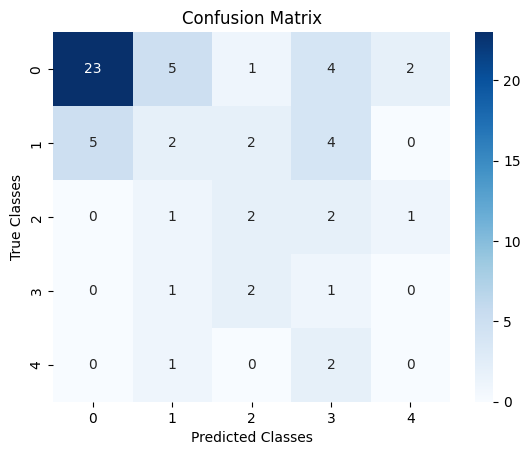

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()


The **confusion matrix** you provided shows that the model is predicting all samples as class `0` (the first class) and is not making any predictions for classes `1, 2, 3, or 4`. This suggests a severe class imbalance issue or that the model has learned to always predict the majority class (`class 0`), which dominates the dataset.

Insights and Recommendations:

1. **Class Imbalance:**
Your dataset likely has a significant imbalance, where the majority of samples belong to class 0 and fewer samples belong to classes 1, 2, 3, and 4. This causes the model to prioritize accuracy for class 0 while ignoring the minority classes.

2. **Class Weights Adjustment:**
It seems that applying class weights did not significantly improve the model's performance across the minority classes. This could mean that the class imbalance is so severe that class weights alone are not enough to solve the problem.

### 2. Oversampling/Undersampling:

Oversampling involves increasing the number of samples in the minority classes, while undersampling involves reducing the number of samples in the majority class.

Library : `imbalanced-learn` library (`imblearn`) to perform
1. oversampling (e.g., SMOTE) or
2. undersampling:

In [114]:
! pip install imblearn

### 2.1 SMOTE (Synthetic Minority Oversampling Technique):

Instead of only relying on class weights, apply SMOTE to oversample the minority classes. This technique generates synthetic examples for the underrepresented classes, allowing the model to better learn these classes.

NOte: Make sure there are no NULL/ `NAN` values in the features

In [115]:
# Apply SMOTE for class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [116]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [117]:
unique, counts = np.unique(y_train, return_counts=True)

dict(zip(unique, counts))

{0.0: 968, 1.0: 242}

In [118]:
import numpy as np
unique, counts = np.unique(y_resampled, return_counts=True)

dict(zip(unique, counts))

{0: 2580, 1: 645}

You can see all the Target Labels have the same number of events

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report

# Load your dataset and handle missing values in 'ca' and 'thal'
missing_values_columns = ['ca', 'thal']
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
df[missing_values_columns] = imputer.fit_transform(df[missing_values_columns])

# Define features and target
X = df.drop('num', axis=1).values
y = df['num'].values

# One-hot encode the target variable (Option 1)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # One-hot encode y

# Alternatively, you can use to_categorical (Option 2)
# y = to_categorical(y, num_classes=5)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# # Apply SMOTE for class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


# print the resampled y and x
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))


# Define the Keras multi-class classifier model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_resampled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_resampled, y_resampled, epochs=50, batch_size=32, validation_data=(X_test, y_test))




{0: 2700, 1: 675}
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2920 - loss: 1.5857 - val_accuracy: 0.3443 - val_loss: 1.5242
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4591 - loss: 1.4040 - val_accuracy: 0.4590 - val_loss: 1.3550
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5643 - loss: 1.2336 - val_accuracy: 0.5246 - val_loss: 1.2263
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5854 - loss: 1.1296 - val_accuracy: 0.5082 - val_loss: 1.1551
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6733 - loss: 0.9831 - val_accuracy: 0.4918 - val_loss: 1.1425
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6741 - loss: 0.9473 - val_accuracy: 0.5410 - val_loss: 1.1140
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6711 - loss: 0.8925 - val_accuracy: 0.5246 - val_loss: 1.1153
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6978 - loss: 0.8500 - val_accuracy: 0.5082 - val_loss: 1.1314
Ep

In [125]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4518 - loss: 2.4685
Test Accuracy: 0.4590


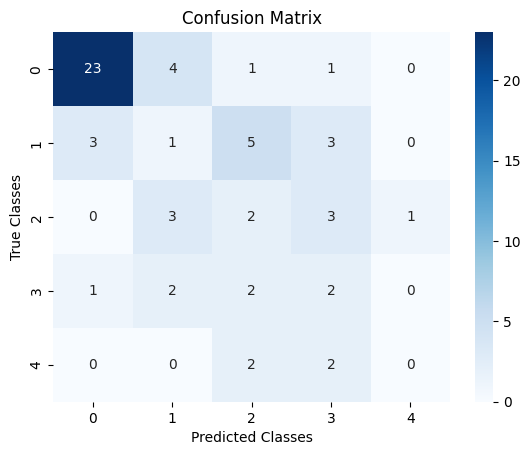

In [128]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

In [129]:
# Predict on new data (test set)
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Evaluate the predictions using classification metrics
print(classification_report(true_classes, predicted_classes))

# Optionally, print the predicted classes for the first 10 examples
print(predicted_classes[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.10      0.08      0.09        12
           2       0.17      0.22      0.19         9
           3       0.18      0.29      0.22         7
           4       0.00      0.00      0.00         4

    accuracy                           0.46        61
   macro avg       0.26      0.28      0.27        61
weighted avg       0.47      0.46      0.46        61

[3 0 2 1 1 3 2 1 0 1]


### 2.2 Data Augmentation or Undersampling:

If oversampling doesn't work, you could try undersampling the majority class (class `0`) to balance the dataset.

# 9. Conclusion
The Keras Classifier and KNN Classifier gives us the best accuracy scores: 0.766